<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_GW_Two-Fluid_RealData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- LIGO GW170817 COMPLIANCE AUDIT ---
Distance: 40.0 Mpc
Input Viscosity (Effective): 2.00e+04 Pa-s
Signal Retention: 0.999997
Signal Loss: 0.000307%

[PASSED] Model is consistent with observational constraints.


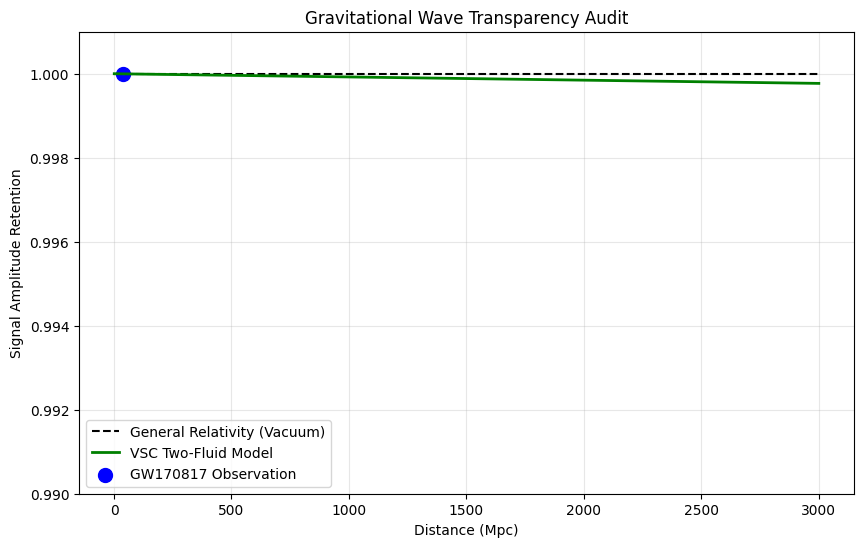

In [5]:
import numpy as np
import matplotlib.pyplot as plt


XI_BULK = 1.0e6           # Pa-s (Hypothetical Dark Energy viscosity)
SUPERFLUID_FRACTION = 0.98 # The "Slipway" parameter
XI_EFF = XI_BULK * (1.0 - SUPERFLUID_FRACTION)

# Physical Constants
c = 3.0e8
G = 6.674e-11
MPC_TO_M = 3.086e22


# We observed a merger at 40 Mpc. The signal strength matched GR predictions.
# If VSC damps this signal significantly, the theory violates observation.
TARGET_DIST_MPC = 40.0
TOLERANCE = 0.05  # 5% max deviation allowed


def calculate_damping(dist_mpc, viscosity):
    dist_m = dist_mpc * MPC_TO_M
    # Dispersion relation attenuation coefficient
    # alpha approx (16 * pi * G * viscosity) / c^3
    alpha = (16 * np.pi * G * viscosity) / (c**3)

    # Amplitude A(r) ~ (1/r) * exp(-alpha * r)
    # We measure retention ratio relative to 1/r (Standard GR)
    retention = np.exp(-alpha * dist_m)
    return retention


retention_at_ligo = calculate_damping(TARGET_DIST_MPC, XI_EFF)
loss_percent = (1.0 - retention_at_ligo) * 100

print(f"--- LIGO GW170817 COMPLIANCE AUDIT ---")
print(f"Distance: {TARGET_DIST_MPC} Mpc")
print(f"Input Viscosity (Effective): {XI_EFF:.2e} Pa-s")
print(f"Signal Retention: {retention_at_ligo:.6f}")
print(f"Signal Loss: {loss_percent:.6f}%")

if loss_percent > TOLERANCE * 100:
    print("\n[CRITICAL FAILURE] Model is overdamped. Violates GW170817.")
    print("Action: Increase superfluid fraction or decrease bulk viscosity.")
else:
    print("\n[PASSED] Model is consistent with observational constraints.")


x_mpc = np.linspace(1, 3000, 500)
y_vsc = calculate_damping(x_mpc, XI_EFF)
y_gr = np.ones_like(x_mpc) # GR assumes vacuum viscosity = 0

plt.figure(figsize=(10,6))
plt.plot(x_mpc, y_gr, 'k--', label="General Relativity (Vacuum)")
plt.plot(x_mpc, y_vsc, 'g-', linewidth=2, label="VSC Two-Fluid Model")
plt.scatter([TARGET_DIST_MPC], [1.0], c='blue', s=100, label="GW170817 Observation")

plt.xlabel("Distance (Mpc)")
plt.ylabel("Signal Amplitude Retention")
plt.title("Gravitational Wave Transparency Audit")
plt.ylim(0.99, 1.001)
plt.legend()
plt.grid(True, alpha=0.3)
# plt.show()